<a href="https://colab.research.google.com/github/ifaindrianningsih/PCVK_Genap-2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

1. Buat Gamma Correction sesuai dengan petunjuk berikut 

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


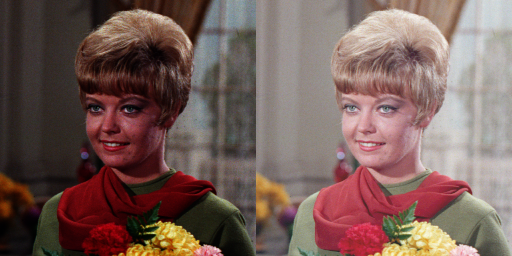

In [4]:
img_f = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB)

print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth

 Bit Depth pada Citra 
---------------------------------
Masukkan nilai Bit Depth: 2


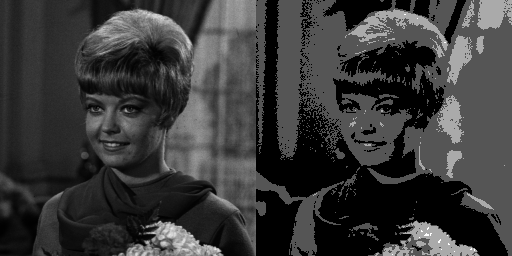

In [21]:
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE) 
bit_depth_image = np.zeros(original.shape, original.dtype)

print(' Bit Depth pada Citra ')
print('---------------------------------')
try:
  bit_depth = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
  print('Error, not a number')

level = 255 / (pow(2,bit_depth)-1) 

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
      bit_depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255)

final_frame = cv.hconcat((original, bit_depth_image))
cv2_imshow(final_frame)

3. Buat modul Average Denoising

Average Denoising Pada Citra
-------------------------------
Masukkan jumlah citra: 100
Nilai PSNR adalah 19.758317288501708 (dB)
Nilai MSE adalah 687.4618968229167


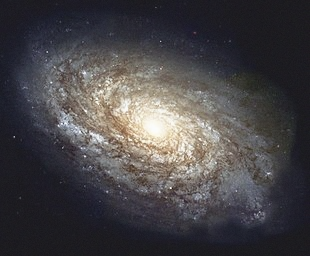

In [65]:
import glob
import math

print('Average Denoising Pada Citra')
print('-------------------------------')

original_image = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)


def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr, mse

try:
  jumlah_citra = int(input('Masukkan jumlah citra: '))
except ValueError:
  print('Error, not a number')

noised_image = np.zeros(cv_img[0].shape)
for i in range (jumlah_citra):
  noised_image = noised_image+cv_img[i]

  
noised_image = noised_image / jumlah_citra

psnr, mse = PSNR(original_image, noised_image)
print('Nilai PSNR adalah',psnr,'(dB)')
print('Nilai MSE adalah', mse)
cv2_imshow(noised_image)

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya

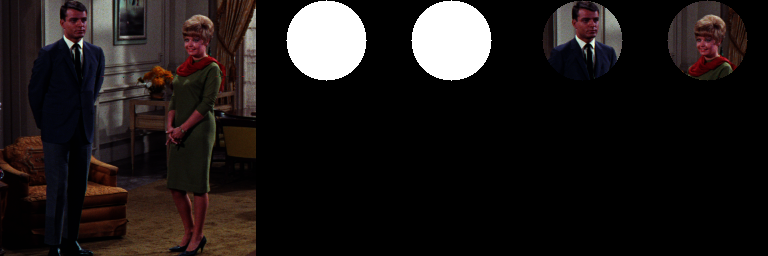

In [53]:
img_t = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

result = img_t & mask

mask1 = cv.circle(mask, (195, 40), 40, (255,255,255), -1)

result = img_t & mask1

final_frame = cv.hconcat((img_t, mask, result))
cv2_imshow(final_frame)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

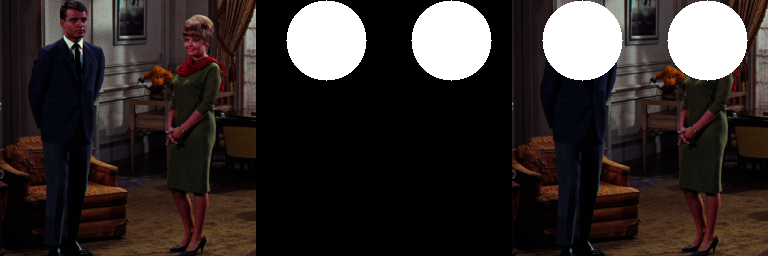

In [55]:
# OPERATOR OR
img_t = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

result = img_t | mask

mask1 = cv.circle(mask, (195, 40), 40, (255,255,255), -1)

result = img_t | mask1

final_frame = cv.hconcat((img_t, mask, result))
cv2_imshow(final_frame)

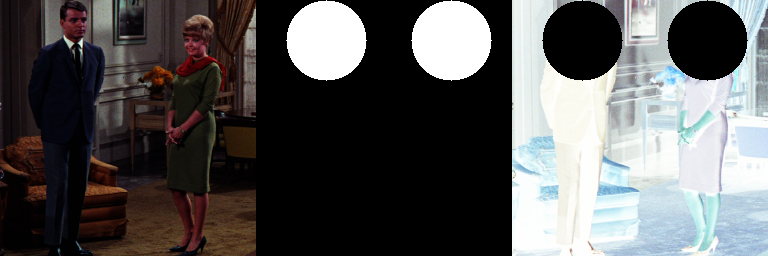

In [57]:
# OPERATOR NOT
img_t = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

result = ~img_t & ~mask

mask1 = cv.circle(mask, (195, 40), 40, (255,255,255), -1)

result = ~img_t & ~mask1

final_frame = cv.hconcat((img_t, mask, result))
cv2_imshow(final_frame)

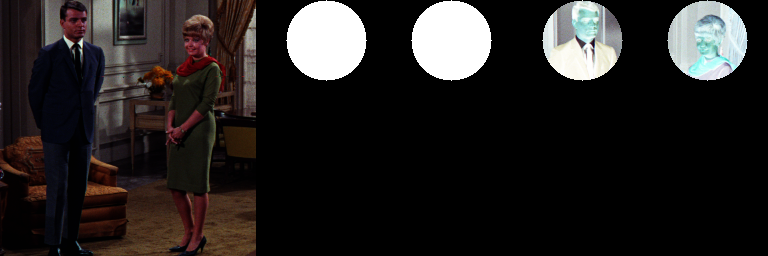

In [58]:
# OPERATOR NAND
img_t = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

result = ~img_t & mask

mask1 = cv.circle(mask, (195, 40), 40, (255,255,255), -1)

result = ~img_t & mask1

final_frame = cv.hconcat((img_t, mask, result))
cv2_imshow(final_frame)

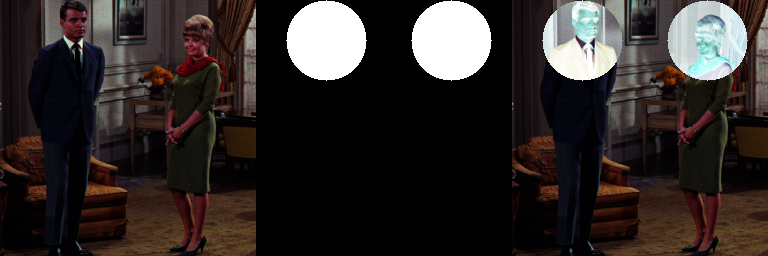

In [59]:
# OPERATOR XOR
img_t = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

result = img_t ^ mask

mask1 = cv.circle(mask, (195, 40), 40, (255,255,255), -1)

result = img_t ^ mask1

final_frame = cv.hconcat((img_t, mask, result))
cv2_imshow(final_frame)